In [212]:
import pandas_datareader.data as web 
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
import yfinance as yf

In [213]:
stocks = ['BVB.DE', 'AJAX.AS', 'OLG.PA', 'JUVE.MI']

number_of_portfolios = 500
RF = 0

start_date = "2012-03-09"
end_date = "2023-03-13"

In [214]:
data = yf.download(stocks, start=start_date, end=end_date)
df = data['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [215]:
df.head()

,AJAX.AS,BVB.DE,JUVE.MI,OLG.PA
Date,,,,
2012-03-09,7.016698,2.273793,0.190636,2.240000
2012-03-12,6.787269,2.251545,0.184189,2.217142
2012-03-13,6.882864,2.282692,0.196990,2.217142
2012-03-14,6.796829,2.296041,0.197451,2.211428
2012-03-15,6.796829,2.313840,0.196162,2.217142


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2012-03-09 to 2023-03-10
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AJAX.AS  2816 non-null   float64
 1   BVB.DE   2791 non-null   float64
 2   JUVE.MI  2794 non-null   float64
 3   OLG.PA   2816 non-null   float64
dtypes: float64(4)
memory usage: 110.2 KB


In [217]:
portfolio_returns = []
portfolio_risk = []
portfolio_weights = []
portfolio_sharpe_ratios = []

In [218]:
for portfolio in range (number_of_portfolios):
    
    # geenrate random weights
    weights = np.random.random_sample(len(stocks))
    weights = np.round(weights/np.sum(weights), 2)
    portfolio_weights.append(weights)
    
    # calculate portfolio returns
    annualized_return = np.sum((df.pct_change().mean() * weights) * 252)
    portfolio_returns.append(annualized_return)

    # calculate portfolio risk
    matrix_covariance = df.pct_change().cov()
    portfolio_variance = np.dot(weights.T, np.dot(matrix_covariance, weights)) * 252
    portfolio_Standard_Deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_Standard_Deviation)
    
    # calculate portfolio sharpe ratio
    portfolio_sharpe_ratio = (annualized_return -RF) / portfolio_Standard_Deviation
    portfolio_sharpe_ratios.append(portfolio_sharpe_ratio)
    

In [219]:
print(portfolio_returns)

[0.10426170716201583, 0.10620711866160058, 0.10222920926233565, 0.09631654748909735, 0.08967358175532718, 0.11171615452879793, 0.10248635775484755, 0.11791864927203136, 0.11025433824469831, 0.101196987901187, 0.1003864780742112, 0.09310684533366723, 0.10703921358101184, 0.10889203128261775, 0.10863832502658947, 0.11011200849899022, 0.1053750909864489, 0.10609043678652187, 0.10849032084026182, 0.1105075760929029, 0.10191005159788571, 0.09707387669568851, 0.09804044705146236, 0.09266548302089171, 0.08960175291112034, 0.11492924902147336, 0.09502259411400912, 0.10921041870764256, 0.0932141590657935, 0.10273392116243255, 0.10424849712215963, 0.1055276094802868, 0.10364879020755388, 0.10800813525407742, 0.1007055359401846, 0.10244499685969753, 0.10035428375540265, 0.10114860971386233, 0.11655800387161473, 0.08976988463100231, 0.1040778643872711, 0.09018964253666324, 0.09839591171215308, 0.09374747532015841, 0.10719304434184572, 0.09613528818281442, 0.09283351297263925, 0.10465224017169841, 

In [220]:
portfolio_returns = np.array(portfolio_returns)
portfolio_risk = np.array(portfolio_risk)
portfolio_sharpe_ratios = np.array(portfolio_sharpe_ratios) 
portfolio_metrics = [portfolio_returns, portfolio_risk, portfolio_sharpe_ratios, portfolio_weights]

In [221]:
port_df = pd.DataFrame(portfolio_metrics).T
port_df.columns = ['Returns', 'Risk', 'Sharpe Ratio', 'Weights']
port_df

,Returns,Risk,Sharpe Ratio,Weights
0,0.104262,0.206426,0.50508,"[0.27, 0.16, 0.32, 0.25]"
1,0.106207,0.230866,0.460037,"[0.5, 0.03, 0.38, 0.09]"
2,0.102229,0.197512,0.517586,"[0.3, 0.29, 0.24, 0.17]"
3,0.096317,0.220901,0.436017,"[0.07, 0.51, 0.08, 0.34]"
4,0.089674,0.2037,0.440225,"[0.56, 0.15, 0.04, 0.25]"
...,...,...,...,...
495,0.1028,0.211434,0.486202,"[0.16, 0.18, 0.31, 0.34]"
496,0.096173,0.207658,0.463132,"[0.35, 0.03, 0.21, 0.41]"
497,0.106524,0.214212,0.497281,"[0.18, 0.23, 0.33, 0.27]"
498,0.098654,0.196965,0.500872,"[0.31, 0.4, 0.14, 0.15]"


In [222]:
port_df.to_csv('C:\\Users\\pc\\Desktop\\Studies\\BECODE\\Projects\\Portfolio_Forecasting_Optimization\\datas\\Portfolios.csv')

In [223]:
min_risk = port_df.iloc[port_df['Risk'].astype(float).idxmin()]   
min_risk

Returns                          0.09561
Risk                            0.188207
Sharpe Ratio                    0.508006
Weights         [0.35, 0.25, 0.13, 0.27]
Name: 466, dtype: object

In [224]:
high_return = port_df.iloc[port_df['Returns'].astype(float).idxmax()]   
high_return

Returns                         0.128831
Risk                            0.350101
Sharpe Ratio                    0.367983
Weights         [0.09, 0.05, 0.81, 0.05]
Name: 320, dtype: object

In [225]:
Best_SR = port_df.iloc[port_df['Sharpe Ratio'].astype(float).idxmax()]   
Best_SR

Returns                         0.101113
Risk                            0.194716
Sharpe Ratio                    0.519281
Weights         [0.33, 0.22, 0.24, 0.21]
Name: 268, dtype: object

In [226]:
print('Min Risk')
print(min_risk)
print(stocks)
print('')


print('Highest Return')
print(high_return)
print(stocks)
print('')


print('Best Sharpe Ratio')
print(Best_SR)
print(stocks)
print('')

Min Risk
Returns                          0.09561
Risk                            0.188207
Sharpe Ratio                    0.508006
Weights         [0.35, 0.25, 0.13, 0.27]
Name: 466, dtype: object
['BVB.DE', 'AJAX.AS', 'OLG.PA', 'JUVE.MI']

Highest Return
Returns                         0.128831
Risk                            0.350101
Sharpe Ratio                    0.367983
Weights         [0.09, 0.05, 0.81, 0.05]
Name: 320, dtype: object
['BVB.DE', 'AJAX.AS', 'OLG.PA', 'JUVE.MI']

Best Sharpe Ratio
Returns                         0.101113
Risk                            0.194716
Sharpe Ratio                    0.519281
Weights         [0.33, 0.22, 0.24, 0.21]
Name: 268, dtype: object
['BVB.DE', 'AJAX.AS', 'OLG.PA', 'JUVE.MI']



In [227]:
df_best = pd.concat([min_risk, Best_SR, high_return], axis=1)

In [228]:
df_best.columns = ['Min Risk', 'Best Sharpe Ratio', 'Highest Return']   

In [229]:
df_best 

,Min Risk,Best Sharpe Ratio,Highest Return
Returns,0.09561,0.101113,0.128831
Risk,0.188207,0.194716,0.350101
Sharpe Ratio,0.508006,0.519281,0.367983
Weights,"[0.35, 0.25, 0.13, 0.27]","[0.33, 0.22, 0.24, 0.21]","[0.09, 0.05, 0.81, 0.05]"


In [230]:
df_best.to_csv('C:\\Users\\pc\\Desktop\\Studies\\BECODE\\Projects\\Portfolio_Forecasting_Optimization\\datas\\BestPortfolio.csv')

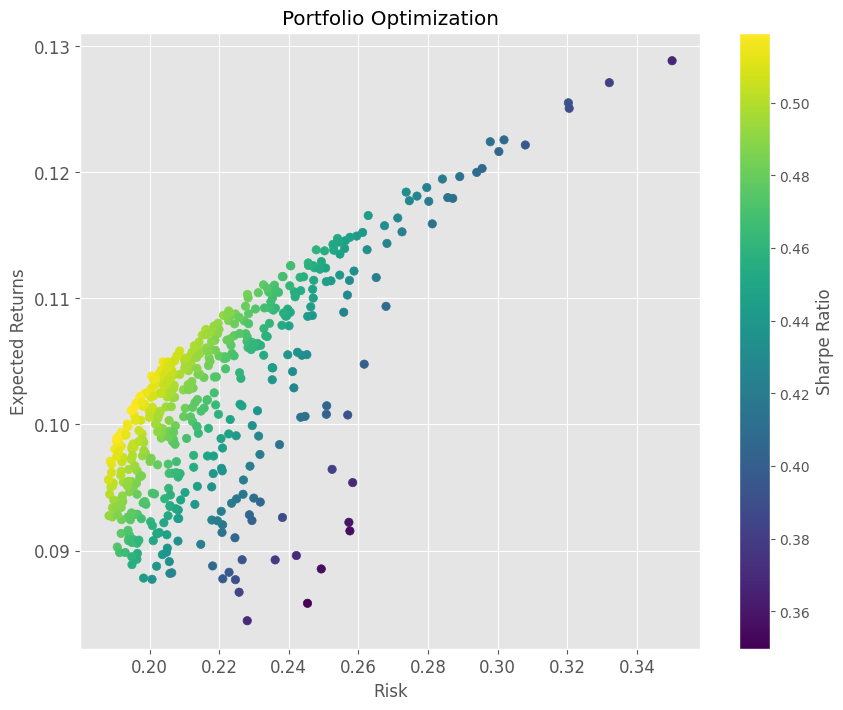

In [231]:
# visuzalization

plt.figure(figsize=(10, 8))
plt.scatter(port_df.Risk, port_df.Returns, c=portfolio_returns / portfolio_risk)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.colorbar(label='Sharpe Ratio')